In [1]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import LogNorm

from invisible_cities.core.fit_functions import fit
from invisible_cities.core.fit_functions import polynom

from CCfun import load_pwr_files
from CCfun import cos

In [2]:
%matplotlib inline

plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams[  "font.size"   ] = 15

In [3]:
path = "/Users/Gonzalo/github/CCdata/pwr_fixed_wl/"

# Measurement of the power at sample site as a function of wavelength and polarization

In [4]:
filenames = os.path.join(path, "*sample*.txt")
filenames = sorted(glob.glob(filenames))

polarizations            = np.arange  (0, 100, 10)
pol_range                = np.linspace(0, 90, 101)
wls, means, stds, ratios = load_pwr_files(filenames)

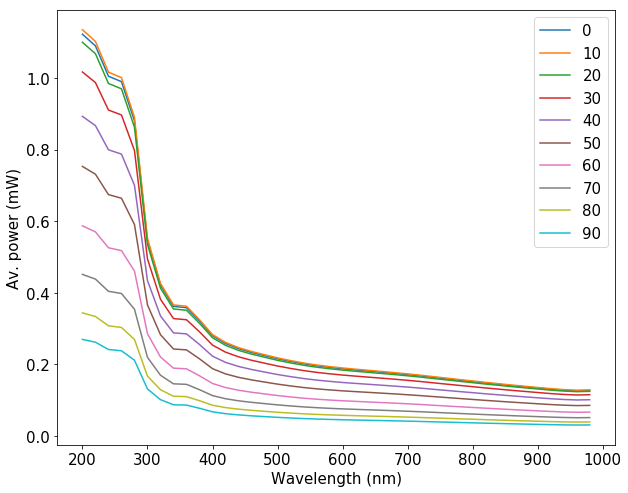

In [5]:
for pol, mean in zip(polarizations, means):
    plt.plot(wls, mean, label=str(pol))

plt.legend()
plt.xlabel("Wavelength (nm)")
plt.ylabel("Av. power (mW)");

# Wavelength dependence of the power

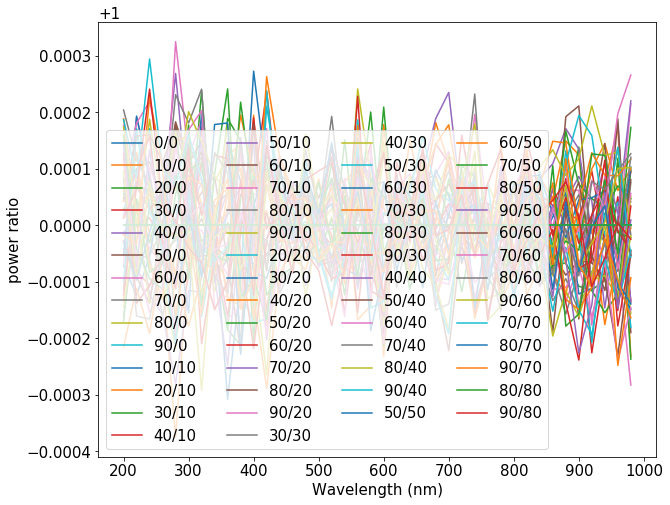

In [6]:
for i, mean0 in enumerate(means[:-1]):
    for j, mean1 in enumerate(means[i:]):
        ratio = mean1 / mean0
        plt.plot(wls, ratio / ratio.mean(), label=f"{polarizations[i+j]}/{polarizations[i]}")

plt.legend(ncol=4)
plt.xlabel("Wavelength (nm)")
plt.ylabel("power ratio");

# Polarization dependence of the power


Power variation  : (0.444 ± 0.004)  mW
Power baseline   : (0.694 ± 0.004)  mW
Maxmimum power at: (8.110 ± 0.065) deg



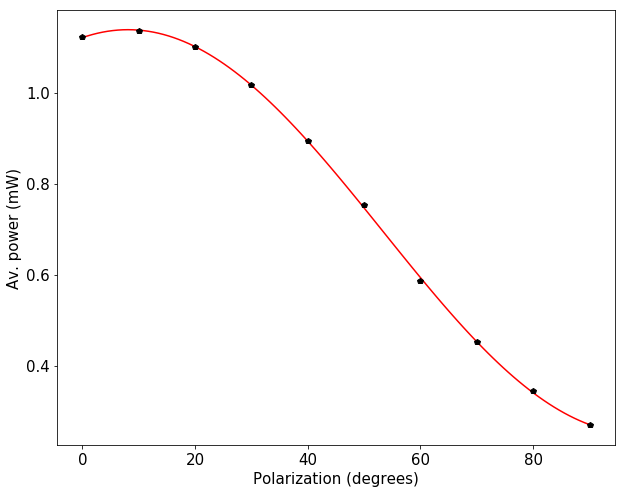

In [7]:
plt.errorbar(polarizations, means[:, 0], stds[:, 0] / 10, fmt="kp")
low  = 0.0, 0.00, -20, 0.5 
seed = 0.5, 0.01,   0, 0.6
upp  = 1.0, 10  ,  20, 1.0 
f = fit(cos, polarizations, means[:, 0], seed, bounds=(low, upp))
plt.plot(pol_range, f.fn(pol_range), "r-")

max_deg   = -f.values[2] / f.values[1]
max_deg_u = ((f.errors[2]**2/f.values[2]**2) + (f.errors[1]**2/f.values[1]**2))**0.5

print(f"""
Power variation  : ({f.values[0]:.3f} ± {f.errors[0]:.3f})  mW
Power baseline   : ({f.values[3]:.3f} ± {f.errors[3]:.3f})  mW
Maxmimum power at: ({max_deg    :.3f} ± {max_deg_u  :.3f}) deg
""")
plt.xlabel("Polarization (degrees)")
plt.ylabel("Av. power (mW)");

# Global plot

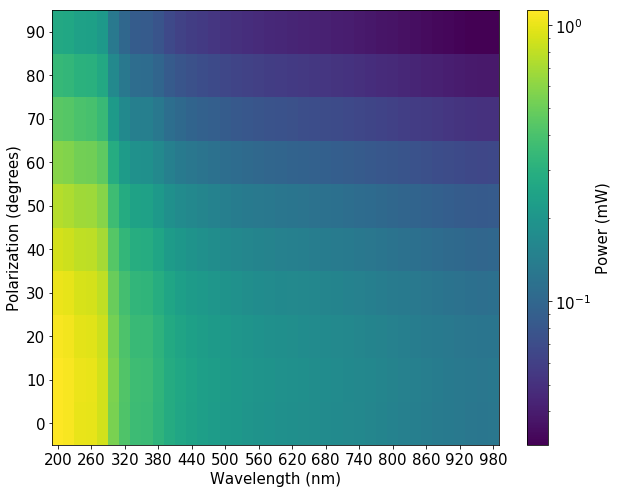

In [8]:
plt.imshow(means, norm=LogNorm(), aspect="auto", origin="lower")
plt.colorbar().set_label("Power (mW)")
plt.xticks(np.arange(0, wls.size, 3), wls[::3])
plt.yticks(np.arange(polarizations.size), polarizations)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Polarization (degrees)");

# Correlate power at sample site with power at regular site

In [9]:
filenames_sample  = sorted(glob.glob(os.path.join(path, "*sample*.txt")))
filenames_regular = sorted(glob.glob(os.path.join(path, "*split*.txt")))

polarizations            = np.arange  (0, 100, 10)
pol_range                = np.linspace(0, 90, 101)
wls, means_sample , stds_sample , ratios_sample  = load_pwr_files(filenames_sample )
___, means_regular, stds_regular, ratios_regular = load_pwr_files(filenames_regular)

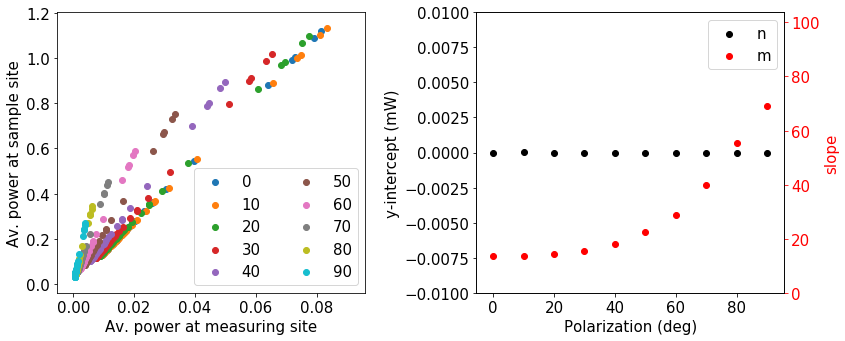

In [10]:
ns, ms = [], [] # y = m*x + n

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
for pol, m_s, m_r in zip(polarizations, means_sample, means_regular):
    plt.scatter(m_r, m_s, label=str(pol))
    f  = fit(polynom, m_r, m_s, (0, 1))
    ns = np.append(ns, f.values[0])
    ms = np.append(ms, f.values[1])

plt.legend(ncol=2)
plt.xlabel("Av. power at measuring site")
plt.ylabel("Av. power at sample site")


plt.subplot(1, 2, 2)
scn = plt.scatter(polarizations, ns, color="k", label="n")
plt.xlabel("Polarization (deg)")
plt.ylabel("y-intercept (mW)")
plt.ylim(-1e-2, 1e-2)

ax2 = plt.twinx()
scm = ax2.scatter(polarizations, ms, color="r", label="m")
plt.ylim(0, ms.max() * 1.5)

ax2.set_ylabel ("slope", color='r')
ax2.tick_params("y", colors='r')

plt.legend((scn, scm), ("n", "m"))

plt.tight_layout()